# 第2章

## 2.1 初识神经网络

In [8]:
#from keras.datasets import mist
from tensorflow.keras.datasets import mnist

output error
---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
<ipython-input-7-fdec84420b09> in <module>
----> 1 from keras.datasets import mist
      2 #from tensorflow.keras.datasets import mnist

ImportError: cannot import name 'mist'

Solved:
https://stackoverflow.com/questions/51809624/import-tensorflow-issue-on-python-3-6
    

In [23]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
len(train_labels)

60000

In [26]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
len(test_labels)

10000

In [29]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [32]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

编译步骤

In [33]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Ready the dataset

In [34]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

Ready labels

In [36]:
from tensorflow.keras.utils import to_categorical

In [37]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 12ms/step - loss: 0.2561 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1042 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0692 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.98 - 5s 11ms/step - loss: 0.0494 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0371 - accuracy: 0.9888


In [39]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0617 - accuracy: 0.9808


In [40]:
print('test_acc', test_acc)

test_acc 0.9807999730110168


## 2.2 Neural netwok data presentation

### 2.1.1 Scalar (0D tensor)

np.array

In [1]:
import numpy as np

In [2]:
x = np.array(12)

In [3]:
x

array(12)

In [4]:
x.ndim

0

### 2.2.2 Vector (1D tensor)

In [5]:
x = np.array([12, 3, 6, 14, 7])

In [6]:
x

array([12,  3,  6, 14,  7])

In [7]:
x.ndim

1

### 2.2.3 矩阵（2D张量）

In [8]:
x= np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])

In [9]:
x.ndim

2

### 2.2.4 3D tensor or farther tensor

In [10]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 79, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

In [11]:
x.ndim

3

### 2.2.5 Key attribute

axis(rank) = ndim

shape:
np.array(3,5) #2D tensor or 2D vector or matrix
np.array(3, 3, 5) #3D tensor
np.array(5,) #1D tensor or vector
np.array() #scalar

dtype:
float32
uint8
float64
char

In [41]:
from tensorflow.keras.datasets import mnist

In [42]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [43]:
print(train_images.ndim)

3


In [44]:
print(train_images.shape)

(60000, 28, 28)


In [45]:
print(train_images.dtype)

uint8


In [47]:
digit = train_images[4]

In [49]:
import matplotlib.pyplot as plt

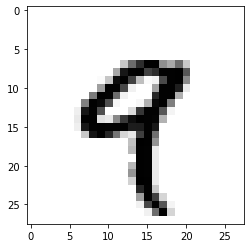

In [50]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.6 Operation tensor in numpy

In [51]:
my_slice = train_images[10:100] #tensor slicing

In [52]:
print(my_slice.shape)

(90, 28, 28)


In [53]:
my_slice = train_images[10:100, :,:]

In [54]:
my_slice.shape

(90, 28, 28)

In [55]:
my_slice = train_images[10:100, 0:28, 0:28]

In [56]:
my_slice.shape

(90, 28, 28)

### 2.2.7 Conception of batch data

In [57]:
batch = train_images[:128]

In [58]:
batch = train_images[128:256]

In [60]:
#batch = train_images[128*n : 128*(n+1)]

### 2.2.8 Really data tensor

vector date or 2D tensor np.array(samples, features)

timed sequence data or 3D tensor np.array(samples, timesteps, features)

image data or 4D tensor np.array(samples, height, width, channels)

video data or 5D tensor np.array(samples, frames, height, width, channels) or np.array(samples, frames, channels, height, width)

### 2.2.9 vector data

np.array(10000, 3) # 10000 person 3 feature that is age, post, revenue

np.array(500, 20000) # 500 documents, 20000 word

### 2.2.10 Time sequence data

np.array(250, 390, 3) # 3 feature that is current price,the maximum price before one minutes , the minimu price before one minute, 390 a deal day minuts, 250 work day

np.array(1000000, 280,128) # 128 is the alphabet of every characters, every article coding to 280 characters,1000000 is number of articles 

### 2.2.11 Image data

np.array(128, 256,256,1) or np.array(128, 256, 256, 3)  # 3 is RGB, 1 is grey, 128 is images, 256 is width and height

### 2.2.12 video data

np.array(4, 240, 144, 256, 3) # 3 is RGB, 144 is width, 256 is height, 240 is all frames, 4 is videos

## 2.3 神经网络的“齿轮”：张量运算

In [64]:
from tensorflow.keras import layers

In [67]:
layers.Dense(512, activation='relu')

In [68]:
output = relu(dot(W, input) + b)

NameError: name 'relu' is not defined

### 2.3.1 element-wise operations

In [69]:
def naive_relu(x):
    assert len(x.shape) == 2 # x type is 2D tensor of numpy
    
    x = x.copy()  # avoid overwrite input tensor
    for i in range(x.shape[0]):
        x[i, j] = max(x[i, j], 0)
    return x
    

In [70]:
def naive_add(x,y):
    assert len(x.shape) == 2 # x and y type is 2D tensor of numpy
    assert x.shape == y.shape
    
    x = x.copy()  # avoid overwrite input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [71]:
import numpy as np

In [72]:
z = x + y

NameError: name 'x' is not defined

In [73]:
z = np.maximum(z, 0.)

NameError: name 'z' is not defined

### 2.3.2 broadcast

In [74]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2 # x type is 2D tensor of numpy 
    assert len(y.shape) == 1 # y type is vector
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [75]:
import numpy as np

In [76]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)

### 2.3.3 tensor dot

In [77]:
import numpy as np

In [78]:
z = np.dot(x, y)

ValueError: shapes (64,3,32,10) and (32,10) not aligned: 10 (dim 3) != 32 (dim 0)

In [79]:
z=x.y

AttributeError: 'numpy.ndarray' object has no attribute 'y'

In [80]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1  # x and y both are numpy vector
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i]*y[i]
    return z

In [81]:
import numpy as np

In [82]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2  # x is 2D tensor or matrix
    assert len(x.shape) == 1  # y is 1D tensor or vector
    assert x.shape[1] == y.shape[0]  # 1 axis of x equals 0 axis of y
    
    z = np.zeros(x.shape[0])  # It's return all zeros vector that shape equals x.shape[0]
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [83]:
def naive_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:], y)
    return z

In [84]:
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2  #x and y both is numpy tensor
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]  # 1D of x size equal 0D of y size
    
    z = np.zertos((x.shape[0], y.shape[1])) # It's return specify shape zeros matrix
    for i in range(x.shape[0]):  # traverse all x row
        for j in range(y.shape[1]):  # traverse all y column
            row_x = x[i, :]
            column_y = y[:, i]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z
        
                  

### 2.3.4 tensor reshaping

In [85]:
train_images = train_images.reshape((60000, 28*28))

In [86]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])

In [87]:
print(x.shape)

(3, 2)


In [88]:
x = x.reshape((6, 1))

In [89]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [90]:
x = x.reshape((2, 3))

In [91]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20))

In [93]:
x = np.transpose(x)

In [94]:
print(x.shape)

(20, 300)


### 2.3.5 tensor operations with Geometric interpretation

## 2.4 Neural network engine: base of gradient optimal

### 2.4.1 derivative

### 2.4.2 the derivative of tensor operations: gradient

In [96]:
import numpy as np

y_pred = dot(W, x)
loss_value = loss(y_pred, y)

loss_value = f(W)

### 2.4.3 random gradient descent

In [100]:
past_velocity = 0.
momentum = 0.1    # momentum is don't change
while loss > 0.01: #optimization loop
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + mumentum*velocity - learning_rate*gradient
    past_velocity = velocity
    update_parameter(w)

NameError: name 'loss' is not defined

### 2.4.4 Chain derivative: backpropagation algorithm

symbolic differentiation

## 2.5 Review the first example 

In [119]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [120]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [121]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [122]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [123]:
network = models.Sequential()

network.add(layers.Dense(512,
 activation='relu', input_shape=(28 * 28,)))

network.add(layers.Dense(10, 
activation='softmax'))

In [124]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [125]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [126]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2539 - accuracy: 0.9269
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1031 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0670 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0493 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0366 - accuracy: 0.9888
